In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [8]:
data_train=pd.read_csv("train_data.csv")
data_test=pd.read_csv("test_data.csv")
data_sample=pd.read_csv("sample_data.csv")
data_test['Datetime']=pd.to_datetime(data_test["Datetime"])
date_time=data_test["Datetime"]

In [9]:
data_train.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,5/5/2017 22:30,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559
1,5/5/2017 21:30,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826
2,4/11/2017 16:40,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364
3,9/30/2017 21:40,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882
4,1/5/2017 10:40,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795


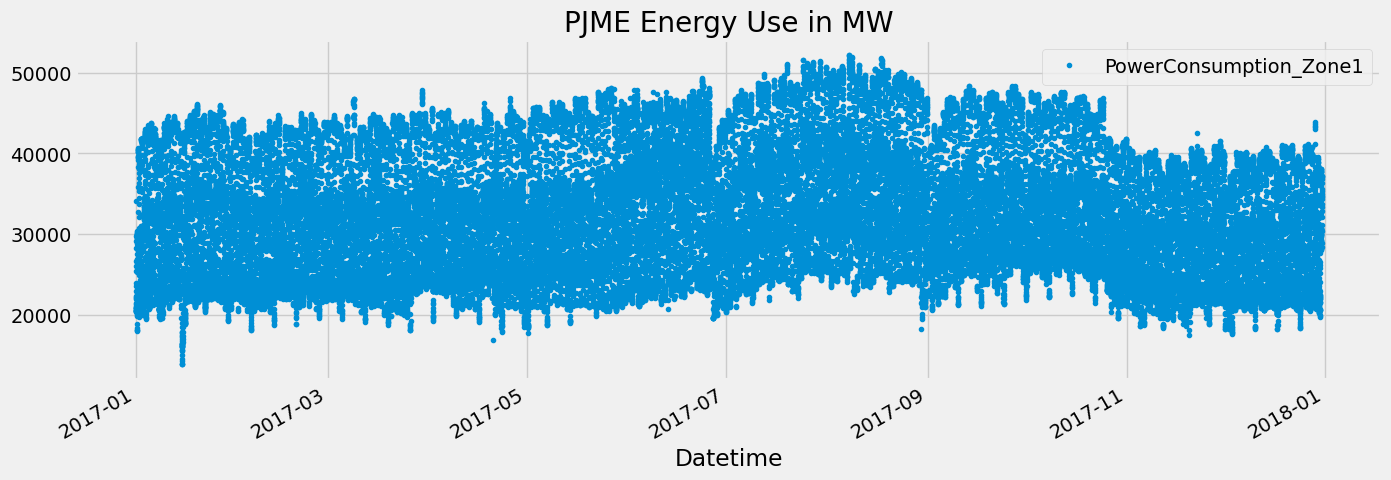

In [10]:
data_train.loc[:,"Datetime"]
df=pd.DataFrame({"Datetime":data_train.loc[:,"Datetime"],"PowerConsumption_Zone1":data_train.loc[:,"PowerConsumption_Zone1"]})
df= df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

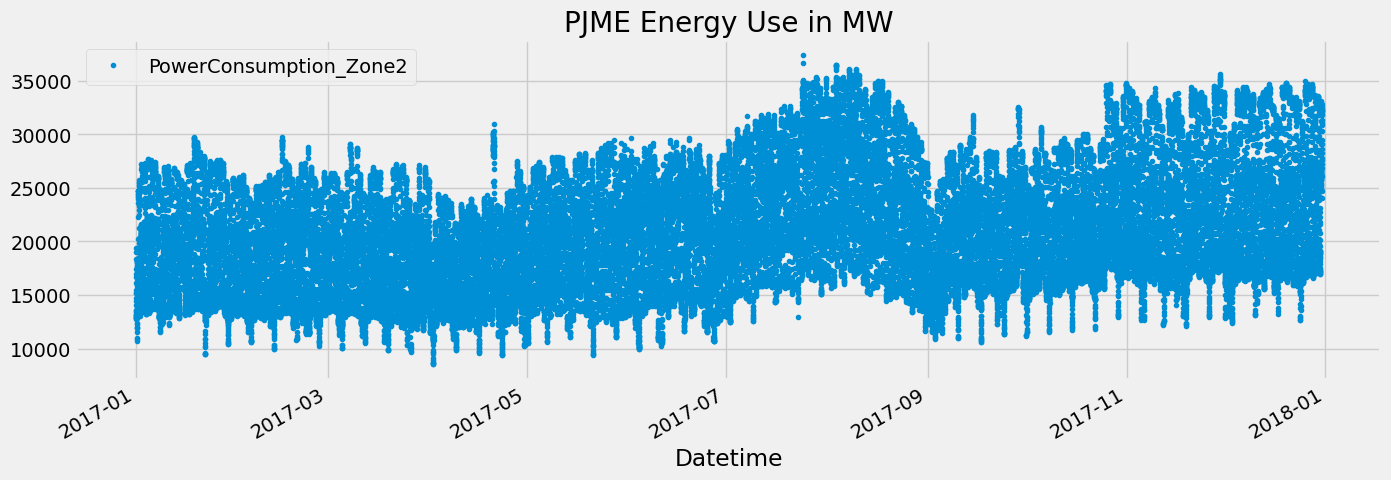

In [11]:

data_train.loc[:,"Datetime"]
df=pd.DataFrame({"Datetime":data_train.loc[:,"Datetime"],"PowerConsumption_Zone2":data_train.loc[:,"PowerConsumption_Zone2"]})
df= df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

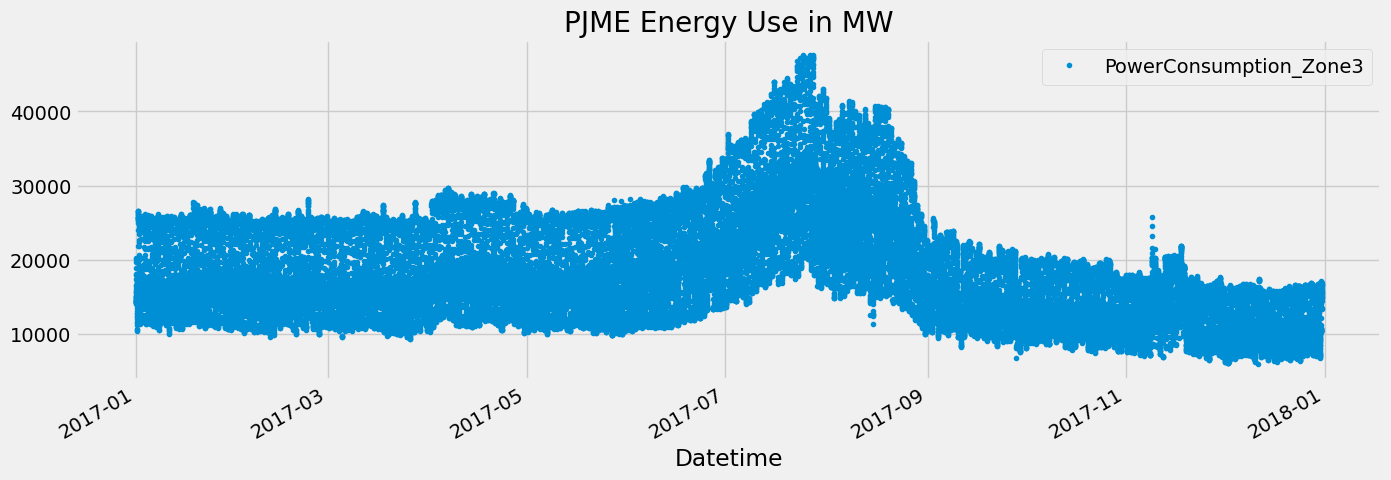

In [12]:
data_train.loc[:,"Datetime"]
df=pd.DataFrame({"Datetime":data_train.loc[:,"Datetime"],"PowerConsumption_Zone3":data_train.loc[:,"PowerConsumption_Zone3"]})
df= df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

<AxesSubplot: title={'center': 'Week Of Data'}, xlabel='Datetime'>

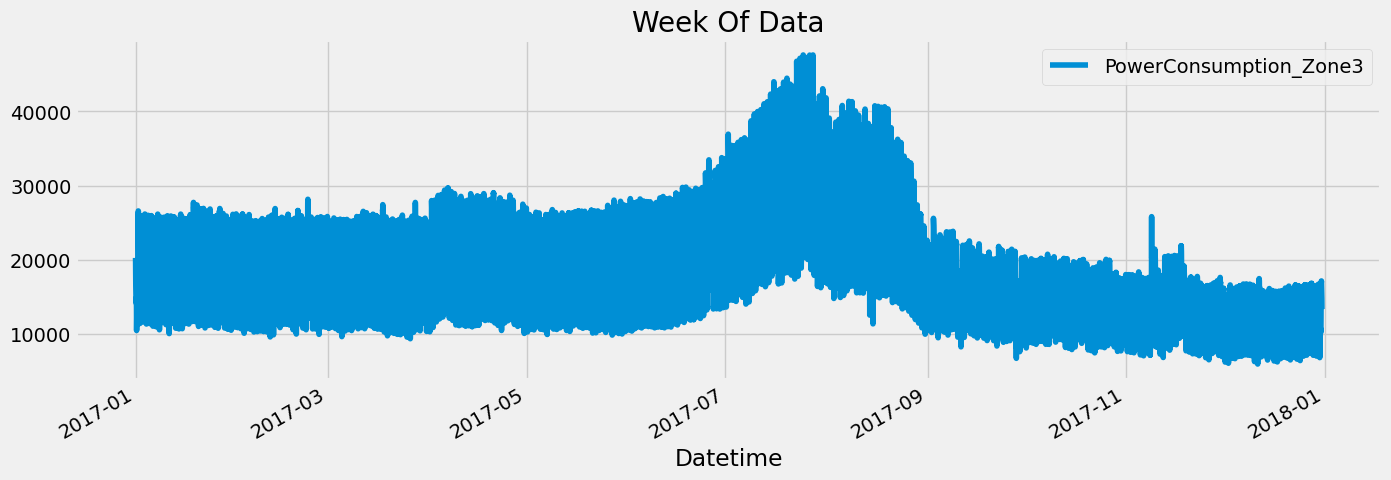

In [13]:
df.plot(figsize=(15, 5), title='Week Of Data')

In [14]:
data_train['Datetime'] = pd.to_datetime(data_train['Datetime'])
data_test['Datetime']=pd.to_datetime(data_test["Datetime"])


In [15]:

data_train['minute'] = data_train['Datetime'].dt.minute
data_train['month'] = data_train['Datetime'].dt.month
data_train['day'] =data_train['Datetime'].dt.day
data_train['hour'] = data_train['Datetime'].dt.hour

data_test['minute'] = data_test['Datetime'].dt.minute
data_test['month'] = data_test['Datetime'].dt.month
data_test['day'] =data_test['Datetime'].dt.day
data_test['hour'] = data_test['Datetime'].dt.hour



In [16]:
data_train=data_train.drop(["Datetime"],axis=1)
data_test=data_test.drop(["Datetime"],axis=1)
data_train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,minute,month,day,hour
0,17.84,55.42,4.920,0.099,0.089,39168.00000,24375.23220,23675.46559,30,5,5,22
1,18.71,49.68,4.919,0.048,0.130,43272.39344,25723.83901,24730.68826,30,5,5,21
2,15.76,85.70,0.068,200.700,182.800,32489.12809,18084.31772,17716.36364,40,4,11,16
3,19.19,83.60,4.919,0.073,0.122,40218.05310,23864.03326,19198.03882,40,9,30,21
4,8.82,65.24,0.084,322.500,40.380,31552.40506,20739.20973,15226.98795,40,1,5,10


In [11]:
names=data_sample.columns
print(names)

Index(['Datetime', 'predicted_Zone1', 'predicted_Zone2', 'predicted_Zone3'], dtype='object')


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:

# Specify the features you want to use for prediction
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','minute', 'month', 'day', 'hour']

# Specify the target variables you want to predict
targets = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2','PowerConsumption_Zone3']

# Split the dataset into training and testing sets
X_train = data_train[features]
y_train = data_train[targets]

# Train a linear regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
X_new = data_test[features]
predictions = xgb_model.predict(X_new)

# Print the mean squared error of the model


In [14]:
#t_value=[sample_data]
from sklearn.metrics import mean_squared_error
value=data_sample[['predicted_Zone1', 'predicted_Zone2', 'predicted_Zone3']]

mse = mean_squared_error(value,predictions)

print("Mean Squared Error:", mse)


Mean Squared Error: 83959168.74806996


In [15]:
print(predictions)
predictions=np.array(predictions)
predictions[:,0]

[[33395.324 20279.465 17856.346]
 [30807.705 24280.914 10534.565]
 [27511.756 16440.078 12378.106]
 ...
 [24244.326 13255.332 11911.037]
 [30955.008 23791.764 11116.545]
 [40521.133 25441.717 25112.049]]


array([33395.324, 30807.705, 27511.756, ..., 24244.326, 30955.008,
       40521.133], dtype=float32)

In [29]:
df1=pd.DataFrame({"Date":date_time.values,
    "predicted_Zone1":predictions[:,0],"predicted_Zone2":predictions[:,1],"predicted_Zone3":predictions[:,2], })

df1.to_csv("submission_ai1.csv",index=False)

In [30]:
df1.head()

,Date,predicted_Zone1,predicted_Zone2,predicted_Zone3
0,2017-02-12 14:40:00,33395.324219,20279.464844,17856.345703
1,2017-11-22 15:30:00,30807.705078,24280.914062,10534.565430
2,2017-10-15 01:50:00,27511.755859,16440.078125,12378.106445
3,2017-09-11 23:00:00,37077.832031,22319.716797,17567.712891
4,2017-12-26 01:20:00,23465.728516,18891.650391,10441.030273
